In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error as mape

In [4]:
df = pd.read_csv("Sept11Travel.csv")

# A view of the data

In [5]:
df

,Month,Air RPM (000s),Rail PM,VMT (billions)
0,Jan-90,35153577,454115779,163.28
1,Feb-90,32965187,435086002,153.25
2,Mar-90,39993913,568289732,178.42
3,Apr-90,37981886,568101697,178.68
4,May-90,38419672,539628385,188.88
...,...,...,...,...
167,Dec-03,57795908,489403554,237.60
168,Jan-04,53447972,410338691,217.30
169,Feb-04,52608801,389778365,210.40
170,Mar-04,63600019,453014590,247.50


# Always convert the time column to a datetime format

In [6]:
df['Month'] = pd.date_range(start='1990/01/01', end='2004/04/01',freq='MS')

In [7]:
df

,Month,Air RPM (000s),Rail PM,VMT (billions)
0,1990-01-01,35153577,454115779,163.28
1,1990-02-01,32965187,435086002,153.25
2,1990-03-01,39993913,568289732,178.42
3,1990-04-01,37981886,568101697,178.68
4,1990-05-01,38419672,539628385,188.88
...,...,...,...,...
167,2003-12-01,57795908,489403554,237.60
168,2004-01-01,53447972,410338691,217.30
169,2004-02-01,52608801,389778365,210.40
170,2004-03-01,63600019,453014590,247.50


# Your time column should be the index - makes it easier to visualise on a plot

In [8]:
df.set_index('Month',inplace=True)

In [9]:
df['t'] = range(1,len(df)+1)

# Visualising the data

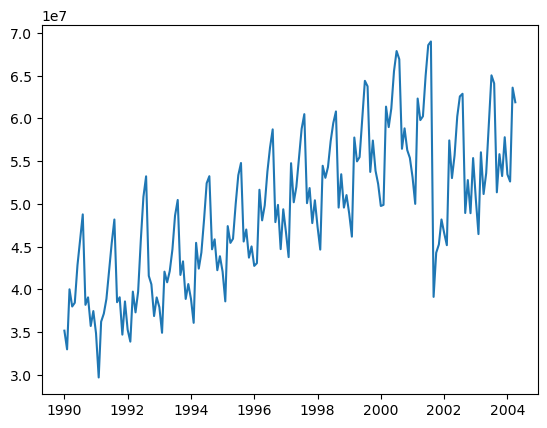

In [10]:
plt.plot(df['Air RPM (000s)'])

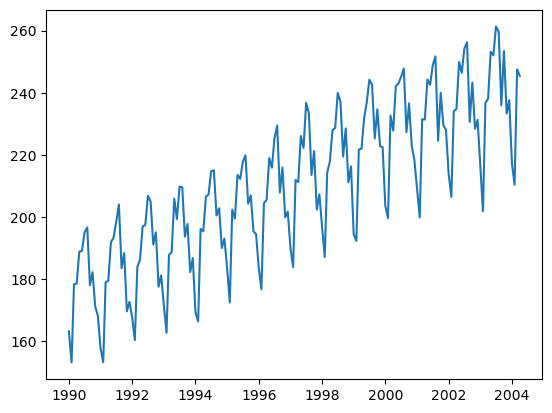

In [11]:
plt.plot(df['VMT (billions)'])

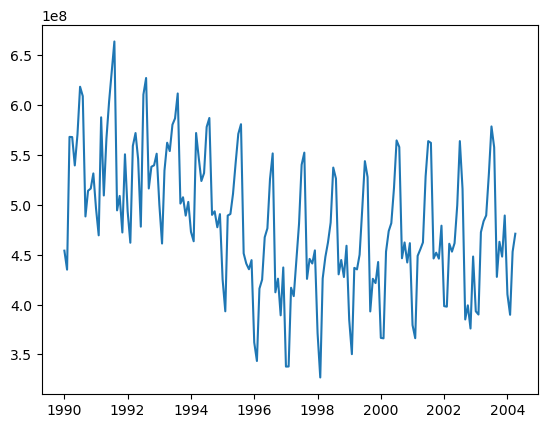

In [12]:
plt.plot(df['Rail PM'])

# Time Series Analysis Part 1 - Travel Dataset

# Components and Decomposition

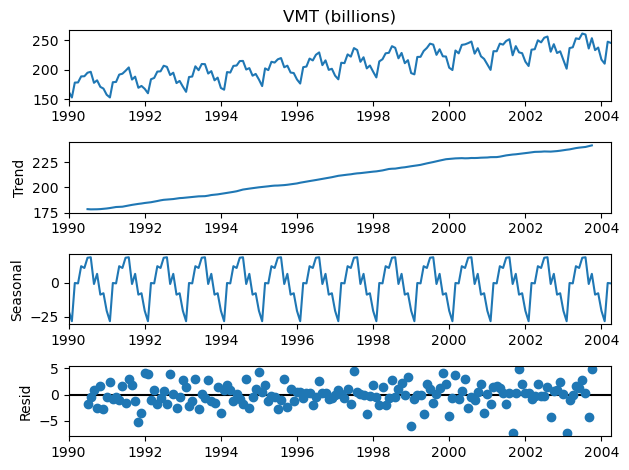

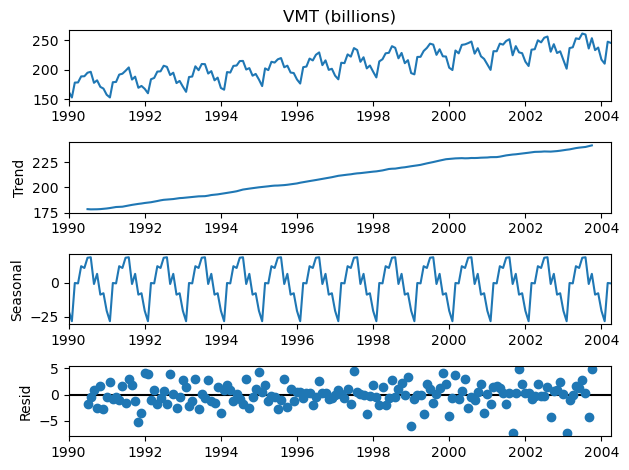

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts_decomposition = seasonal_decompose(df['VMT (billions)'],model='additive')
ts_decomposition.plot()

# Linear Regression with only the trend component

In [14]:
import statsmodels.api as sm

X = df['t']
y = df['VMT (billions)']
X = sm.add_constant(X)
linear_model = sm.OLS(y,X).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         VMT (billions)   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     333.3
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           6.46e-42
Time:                        14:56:26   Log-Likelihood:                -703.55
No. Observations:                 172   AIC:                             1411.
Df Residuals:                     170   BIC:                             1417.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        174.9761      2.228     78.535      0.000     170.578     179.374
t              0.4078      0.022     18.255      0.000       0.364       0.452
==============================================================================
Omnibus:                       10.148   Durbin-Watson:                   0.843
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                9.132
Skew:                          -0.493   Prob(JB):                       0.0104
Kurtosis:                       2.451   Cond. No.                         200.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

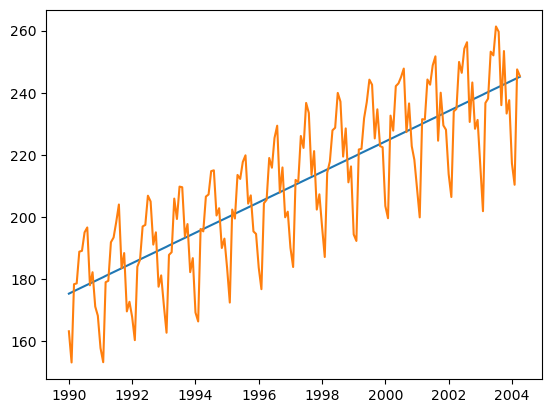

In [15]:
df['linear_model_results'] = linear_model.predict()
plt.plot(df['linear_model_results'])
plt.plot(df['VMT (billions)'])

# Linear Regression - Trend, Seasonality

In [16]:
# Create a column for month
df['month'] = df.index.month

In [17]:
df_lm_2 = pd.concat([pd.get_dummies(df['month'],drop_first=True),df[['t','VMT (billions)']]],axis=1)

In [18]:
X_train = df_lm_2.iloc[:144,:12]
X_test = df_lm_2.iloc[144:,:12]
y_train = df_lm_2.iloc[:144,12]
y_test = df_lm_2.iloc[144:,12]
X_train_sm = sm.add_constant(X_train)
linear_model = sm.OLS(y_train,X_train_sm).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         VMT (billions)   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     891.5
Date:                Thu, 27 Jun 2024   Prob (F-statistic):          3.08e-119
Time:                        14:56:32   Log-Likelihood:                -337.40
No. Observations:                 144   AIC:                             700.8
Df Residuals:                     131   BIC:                             739.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        154.0111      0.842    182.993      0.000     152.346     155.676
2             -7.3464      1.078     -6.812      0.000      -9.480      -5.213
3             20.2113      1.079     18.740      0.000      18.078      22.345
4             19.7548      1.079     18.315      0.000      17.621      21.889
5             31.9059      1.079     29.579      0.000      29.772      34.040
6             30.9345      1.079     28.675      0.000      28.800      33.069
7             38.3655      1.079     35.558      0.000      36.231      40.500
8             38.7308      1.079     35.891      0.000      36.596      40.865
9             19.7352      1.079     18.285      0.000      17.600      21.870
10            26.0437      1.080     24.125      0.000      23.908      28.179
11            11.0023      1.080     10.189      0.000       8.866      13.138
12            11.9242      1.080     11.040      0.000       9.788      14.061
t              0.4273      0.005     80.401      0.000       0.417       0.438
==============================================================================
Omnibus:                        9.831   Durbin-Watson:                   1.521
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               19.486
Skew:                           0.202   Prob(JB):                     5.87e-05
Kurtosis:                       4.756   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

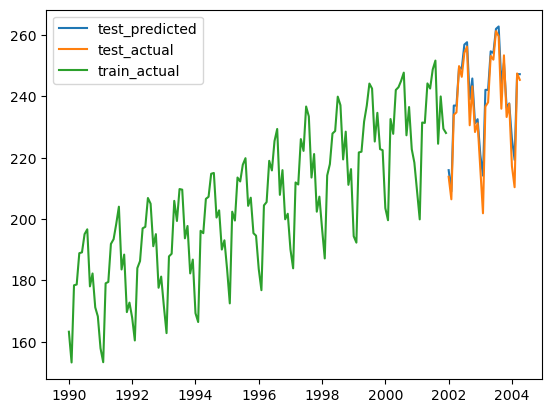

In [19]:
plt.plot(linear_model.predict(sm.add_constant(X_test)),label='test_predicted')
plt.plot(y_test,label='test_actual')
plt.plot(y_train, label='train_actual')
plt.legend()

In [20]:
mape(linear_model.predict(sm.add_constant(X_test)),y_test)

0.015284277989949467

In [21]:
from sklearn.metrics import r2_score

r2_score(linear_model.predict(sm.add_constant(X_test)),y_test)

0.8951630337548822

# ACF and PACF introduction

# What are lags?

In [22]:
df_rail = pd.DataFrame()
df_rail['y(t)'] = df['Rail PM']
df_rail['y(t-1)'] = [float('nan')]+list(df_rail['y(t)'][:-1])
df_rail['y(t-2)'] = [float('nan')]+list(df_rail['y(t-1)'][:-1])

In [23]:
df_rail

,y(t),y(t-1),y(t-2)
Month,,,
1990-01-01,454115779,NaN,NaN
1990-02-01,435086002,454115779.0,NaN
1990-03-01,568289732,435086002.0,454115779.0
1990-04-01,568101697,568289732.0,435086002.0
1990-05-01,539628385,568101697.0,568289732.0
...,...,...,...
2003-12-01,489403554,448181812.0,463025617.0
2004-01-01,410338691,489403554.0,448181812.0
2004-02-01,389778365,410338691.0,489403554.0


# Correlation between y(t) and its lags

In [24]:
df_rail.corr()

,y(t),y(t-1),y(t-2)
y(t),1.000000,0.662715,0.411188
y(t-1),0.662715,1.000000,0.662701
y(t-2),0.411188,0.662701,1.000000


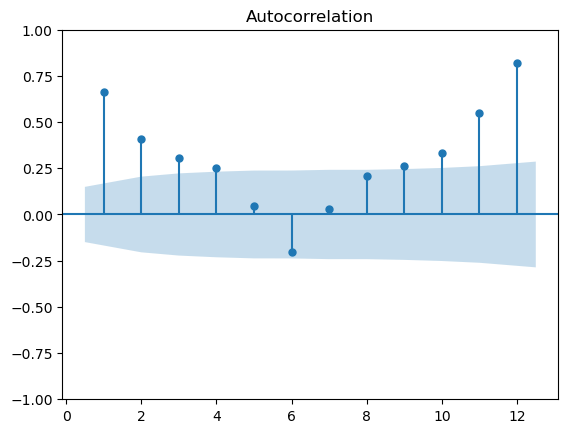

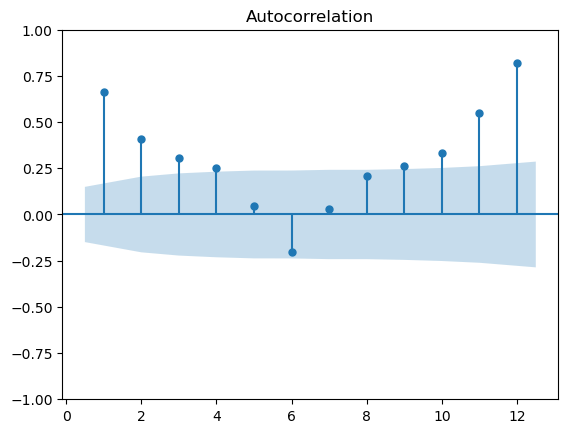

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_rail['y(t)'],lags=range(1,13))

/opt/conda/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


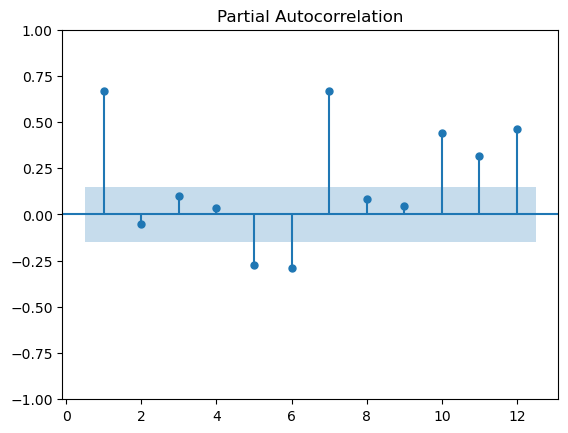

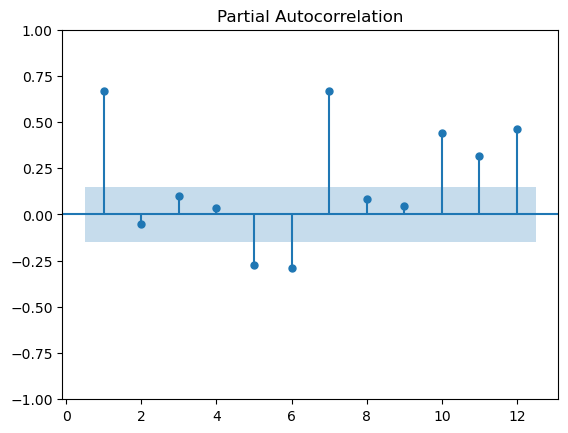

In [26]:
plot_pacf(df_rail['y(t)'],lags=range(1,13))

# Differencing and stationarity

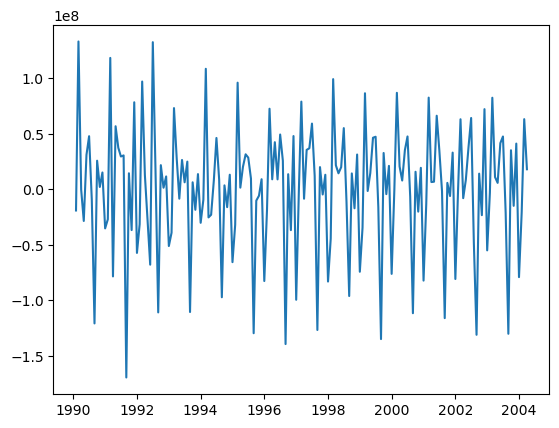

In [27]:
plt.plot(df_rail['y(t)'].diff())

In [28]:
from statsmodels.tsa.stattools import adfuller
df_stationarityTest = adfuller(df_rail['y(t)'].diff().dropna())
df_stationarityTest[1]

1.7815901610391407e-08

/opt/conda/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


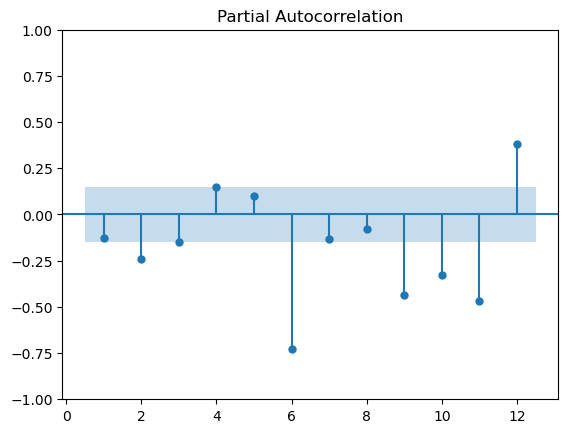

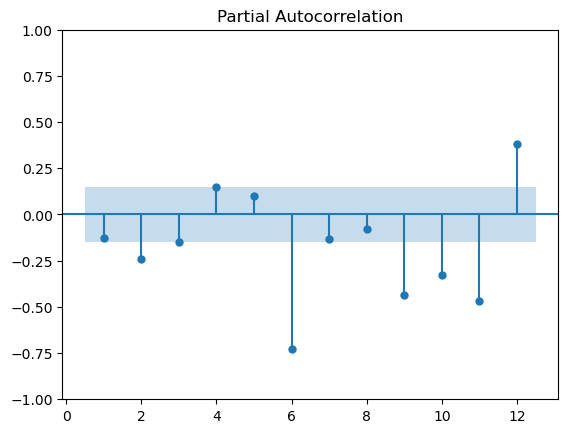

In [29]:
plot_pacf(df_rail['y(t)'].diff().dropna(),lags=range(1,13))

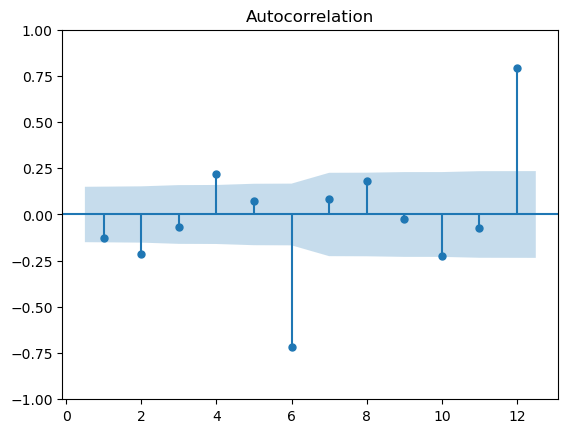

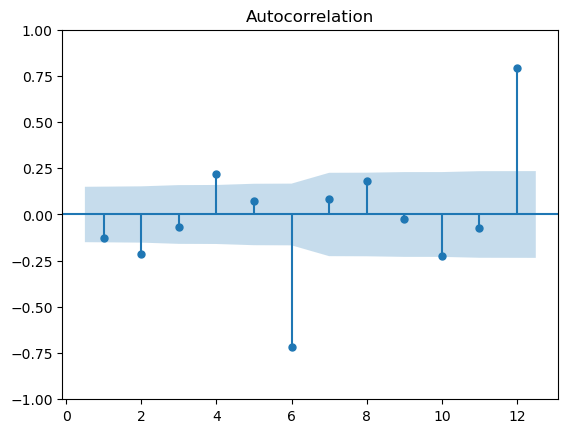

In [30]:
plot_acf(df_rail['y(t)'].diff().dropna(),lags=range(1,13))

In [31]:
from statsmodels.tsa.ar_model import AutoReg

X_train = df['Rail PM'].diff().dropna()[:144]
X_test = df['Rail PM'].diff().dropna()[144:]

In [32]:
ar_model = AutoReg(X_train, lags=4).fit()

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [33]:
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                Rail PM   No. Observations:                  144
Model:                     AutoReg(4)   Log Likelihood               -2688.483
Method:               Conditional MLE   S.D. of innovations       52931630.440
Date:                Thu, 27 Jun 2024   AIC                           5388.966
Time:                        14:57:02   BIC                           5406.616
Sample:                    06-01-1990   HQIC                          5396.138
                         - 01-01-2002                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.289e+06   4.47e+06     -0.288      0.773   -1.01e+07    7.48e+06
Rail PM.L1    -0.1839      0.084     -2.190      0.029      -0.349      -0.019
Rail PM.L2    -0.2122      0.085     -2.499      0.0

In [34]:
pred = ar_model.predict(start=len(X_train), end=(len(df)-1), dynamic=False)

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [35]:
pred

2002-02-01    8.102292e+06
2002-03-01    9.850788e+06
2002-04-01    9.083272e+06
2002-05-01   -1.862306e+07
2002-06-01    4.219770e+05
2002-07-01    3.157296e+06
2002-08-01    1.475820e+06
2002-09-01   -5.204733e+06
2002-10-01   -9.183229e+05
2002-11-01    3.225523e+05
2002-12-01   -3.602773e+05
2003-01-01   -2.010524e+06
2003-02-01   -1.021565e+06
2003-03-01   -5.844819e+05
2003-04-01   -8.044054e+05
2003-05-01   -1.222810e+06
2003-06-01   -9.907143e+05
2003-07-01   -8.521629e+05
2003-08-01   -9.164264e+05
2003-09-01   -1.024823e+06
2003-10-01   -9.696665e+05
2003-11-01   -9.280904e+05
2003-12-01   -9.458750e+05
2004-01-01   -9.744185e+05
2004-02-01   -9.611974e+05
2004-03-01   -9.491160e+05
2004-04-01   -9.538666e+05
2004-05-01   -9.614707e+05
Freq: MS, dtype: float64

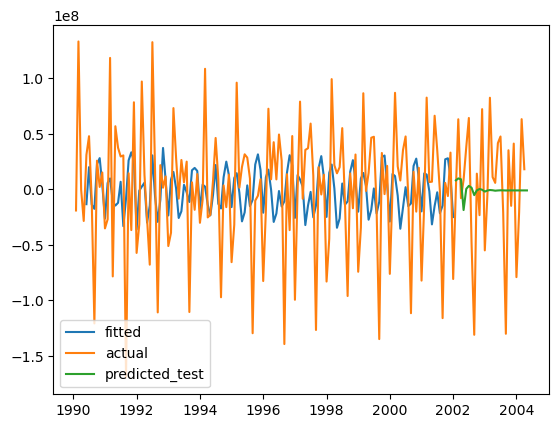

In [36]:
plt.plot(ar_model.predict(),label='fitted')
plt.plot(df['Rail PM'].diff().dropna(),label='actual')
plt.plot(pred,label='predicted_test')
plt.legend()

# Visualising the inverse differenced series'

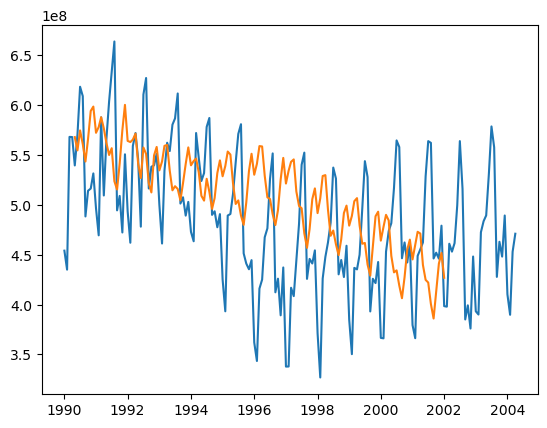

In [37]:
plt.plot(np.cumsum(df['Rail PM'].diff().fillna(df['Rail PM'][0])))
plt.plot(np.cumsum(ar_model.predict()[3:].fillna(df['Rail PM'][3])))

In [38]:
mape(np.cumsum(df['Rail PM'].diff().fillna(df['Rail PM'][0]))[:141],np.cumsum(ar_model.predict()[3:].fillna(df['Rail PM'][3])))

0.1226670110045514

# ARIMA

In [39]:
X_train = df['Rail PM'][:144]
X_test = df['Rail PM'][144:]

In [40]:
import statsmodels.api as sm
ma_model = sm.tsa.arima.ARIMA(X_train, order=(0,1,4))
res = ma_model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                Rail PM   No. Observations:                  144
Model:                 ARIMA(0, 1, 4)   Log Likelihood               -2749.466
Date:                Thu, 27 Jun 2024   AIC                           5508.931
Time:                        14:57:16   BIC                           5523.745
Sample:                    01-01-1990   HQIC                          5514.951
                         - 12-01-2001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0829      0.088     -0.937      0.349      -0.256       0.090
ma.L2          0.1990      0.075      2.656      0.008       0.052       0.346
ma.L3         -0.0934      0.062     -1.499      0.1

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


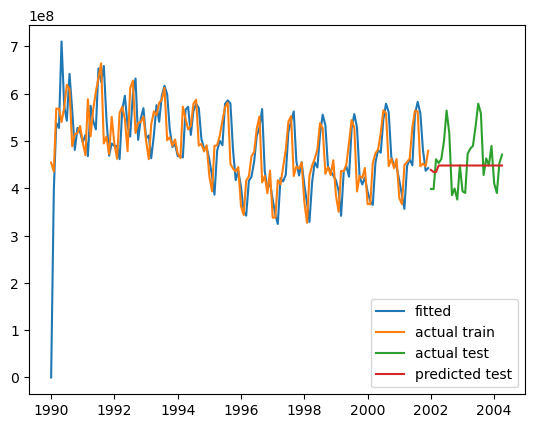

In [41]:
plt.plot(res.predict(), label='fitted')
plt.plot(X_train,label='actual train')
plt.plot(X_test,label='actual test')
plt.plot(res.predict(start=len(X_train), end=(len(df)-1)), label='predicted test')
plt.legend()

In [42]:
mape(res.predict(start=len(X_train), end=(len(df)-1)),X_test)

0.10238907092286312

In [43]:
arima_model = sm.tsa.arima.ARIMA(X_train, order=(4,1,4))
res = arima_model.fit()
print(res.summary())

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                Rail PM   No. Observations:                  144
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -2731.018
Date:                Thu, 27 Jun 2024   AIC                           5480.036
Time:                        14:57:25   BIC                           5506.702
Sample:                    01-01-1990   HQIC                          5490.872
                         - 12-01-2001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3073      0.264      1.163      0.245      -0.211       0.825
ar.L2         -0.4750      0.195     -2.438      0.015      -0.857      -0.093
ar.L3          0.3371      0.258      1.306      0.1

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


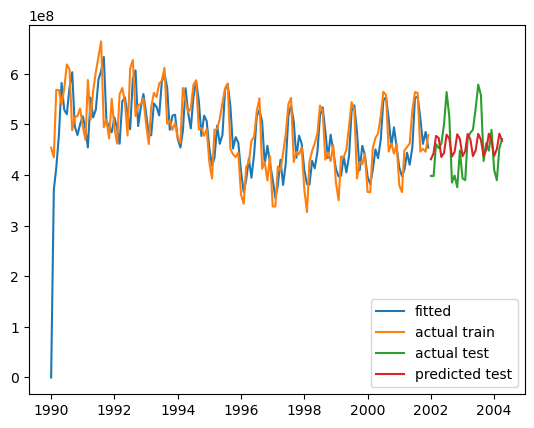

In [44]:
plt.plot(res.predict(), label='fitted')
plt.plot(X_train,label='actual train')
plt.plot(X_test,label='actual test')
plt.plot(res.predict(start=len(X_train), end=(len(df)-1)), label='predicted test')
plt.legend()

In [45]:
mape(res.predict(start=len(X_train), end=(len(df)-1)),X_test)

0.09266953831807649

7.5489744238923e-09

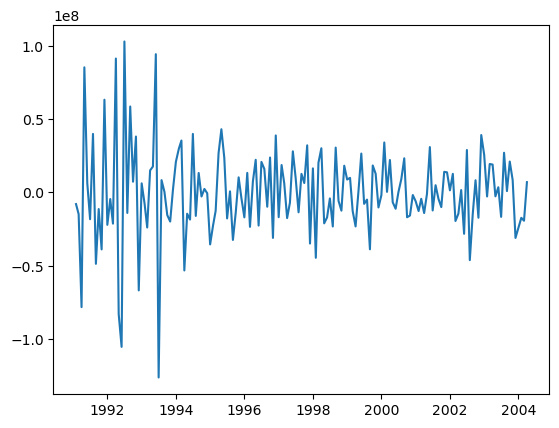

In [46]:
plt.plot(df_rail['y(t)'].diff().diff(12))
df_stationarityTest = adfuller(df_rail['y(t)'].diff().diff(12).dropna())
df_stationarityTest[1]

In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarimax_model = SARIMAX(X_train, order=(4,1,4),seasonal_order=(1,1,1,12))
res = sarimax_model.fit()
print(res.summary())

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.71658D+01    |proj g|=  8.48312D-01


 This problem is unconstrained.



At iterate    5    f=  1.69863D+01    |proj g|=  5.27655D-02

At iterate   10    f=  1.69468D+01    |proj g|=  1.65111D-01

At iterate   15    f=  1.69316D+01    |proj g|=  1.01403D-02

At iterate   20    f=  1.69285D+01    |proj g|=  2.28351D-02

At iterate   25    f=  1.69227D+01    |proj g|=  7.62666D-02

At iterate   30    f=  1.69097D+01    |proj g|=  1.60378D-01

At iterate   35    f=  1.68891D+01    |proj g|=  1.86028D-01

At iterate   40    f=  1.68826D+01    |proj g|=  2.90178D-02

At iterate   45    f=  1.68778D+01    |proj g|=  9.78652D-02

At iterate   50    f=  1.68763D+01    |proj g|=  1.70636D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                              Rail PM   No. Observations:                  144
Model:             SARIMAX(4, 1, 4)x(1, 1, [1], 12)   Log Likelihood               -2430.181
Date:                              Thu, 27 Jun 2024   AIC                           4882.362
Time:                                      14:58:12   BIC                           4913.989
Sample:                                  01-01-1990   HQIC                          4895.213
                                       - 12-01-2001                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4668      0.337      1.387      0.166      -0.193       1.127
ar.L2          0.07

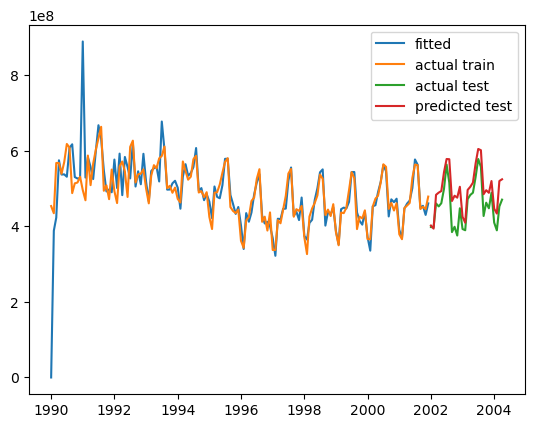

In [48]:
plt.plot(res.predict(), label='fitted')
plt.plot(X_train,label='actual train')
plt.plot(X_test,label='actual test')
plt.plot(res.predict(start=len(X_train), end=(len(df)-1)), label='predicted test')
plt.legend()

In [49]:
mape(res.predict(start=len(X_train), end=(len(df)-1)),X_test)

0.08163443703619354

# Smoothing Methods

In [50]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [51]:
X_train = df['VMT (billions)'][:144]
X_test = df['VMT (billions)'][144:]

# Simple Exponential Smoothing

In [52]:
ses_model = SimpleExpSmoothing(X_train).fit(
    smoothing_level=0.2, optimized=False)

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


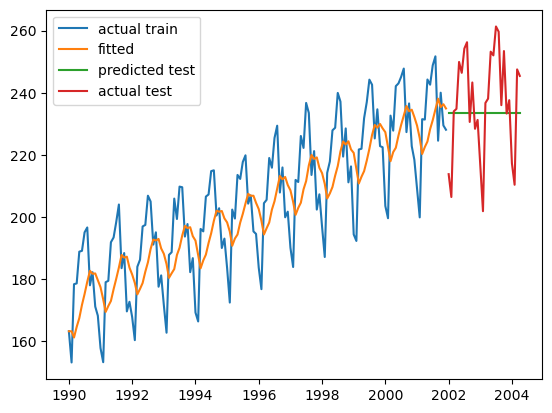

In [53]:
plt.plot(X_train,label='actual train')
plt.plot(ses_model.fittedvalues,label='fitted')
plt.plot(ses_model.forecast(len(X_test)),label='predicted test')
plt.plot(X_test,label='actual test')
plt.legend()

# Double/holt's smoothing

In [54]:
mape(ses_model.forecast(len(X_test)),X_test)

0.058264272814332205

In [55]:
holt_model = Holt(X_train).fit(
    smoothing_level=0.2, smoothing_trend=0.2, optimized=False
)

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


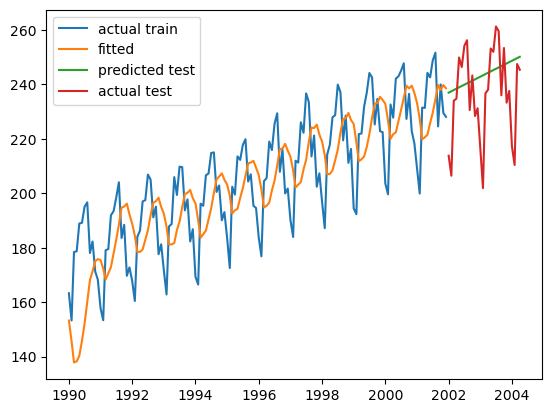

In [56]:
plt.plot(X_train,label='actual train')
plt.plot(holt_model.fittedvalues,label='fitted')
plt.plot(holt_model.forecast(len(X_test)),label='predicted test')
plt.plot(X_test,label='actual test')
plt.legend()

In [57]:
mape(holt_model.forecast(len(X_test)),X_test)

0.05727411916281181

# Triple/holt-winter's smoothing

In [58]:
exp_model = ExponentialSmoothing(
    X_train,
    seasonal_periods=12,
    trend="add",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


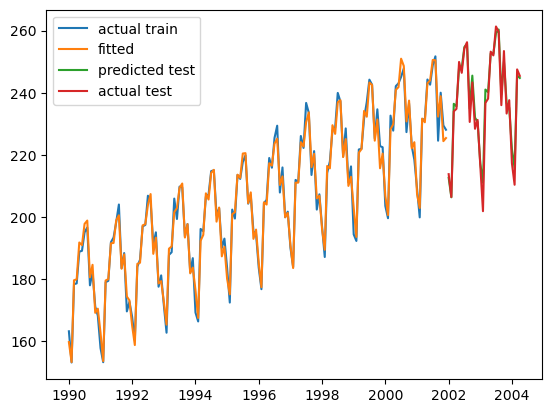

In [59]:
plt.plot(X_train,label='actual train')
plt.plot(exp_model.fittedvalues,label='fitted')
plt.plot(exp_model.forecast(len(X_test)),label='predicted test')
plt.plot(X_test,label='actual test')
plt.legend()

In [60]:
mape(exp_model.forecast(len(X_test)),X_test)

0.0099754174547268